In [16]:
import bootstrap
import matplotlib.pyplot as plt
import time
import datetime
import numpy as np

In [17]:
def plot_grid(l,dim,table,sig_range,eps_range):
    start_time=time.time()
    start_cpu=time.clock()
    allowed_sig=[]
    allowed_eps=[]
    disallowed_sig=[]
    disallowed_eps=[]
    for sig in sig_range:
        for eps in eps_range:
            sdp=bootstrap.SDP(sig,table)
            sdp.set_bound(0,float(dim))
            sdp.add_point(0,eps)
            result=sdp.iterate()
            if result:
                allowed_sig.append(sig)
                allowed_eps.append(eps)
            else:
                disallowed_sig.append(sig)
                disallowed_eps.append(eps)
    end_time=time.time()
    end_cpu=time.clock()
    run_time=time.strftime("%H:%M:%S",time.gmtime(end_time-start_time))
    cpu_time=time.strftime("%H:%M:%S",time.gmtime(end_cpu-start_cpu))
    plt.plot(allowed_sig,allowed_eps,'r+')
    plt.plot(disallowed_sig,disallowed_eps,'b+')
    plt.title("l_max="+str(l)+". Time Taken: "+run_time+". CPU Time: "+cpu_time)
    plt.show()

In [27]:
def iterate_l_max(l_range):
    if type(l_range)==int:
        l_range=[l_range]
    start_time=time.time()
    start_cpu=time.clock()
    sig_set=np.arange(0.5,0.85,0.05)
    eps_set=np.arange(1.0,2.2,0.2)
    bootstrap.cutoff=1e-10
    dim=3
    k_max=20
#    l_max=15
    n_max=4
    m_max=2
    for l in l_range:
        tab1=bootstrap.ConformalBlockTable(dim,k_max,l,m_max,n_max)
        tab2=bootstrap.ConvolvedBlockTable(tab1)
        plot_grid(l,dim,tab2,sig_set,eps_set)
    end_time=time.time()
    end_cpu=time.clock()
    run_time=time.strftime("%H:%M:%S",time.gmtime(end_time-start_time))
    cpu_time=time.strftime("%H:%M:%S",time.gmtime(end_cpu-start_cpu))
    print("Run time "+run_time, "CPU time "+cpu_time)

/Users/MatthewDowens/Dropbox/PhD/bootstrap/pycftboot/bootstrap.py:952: RuntimeWarning: invalid value encountered in subtract
  product *= x - (p - shift)
/Users/MatthewDowens/Dropbox/PhD/bootstrap/pycftboot/bootstrap.py:953: RuntimeWarning: invalid value encountered in add
  return (base ** (x + shift)) / product


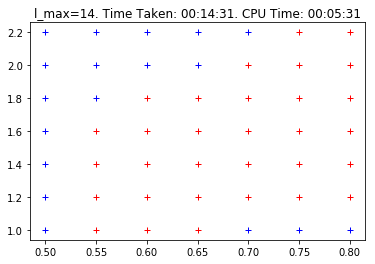

Run time 00:14:42 CPU time 00:05:42


In [21]:
start_time=time.time()
start_cpu=time.clock()

#l_set=np.arange(1,8,1)
l_set=[14]
#sig_set=np.arange(0.5,0.85,0.05)
#eps_set=np.arange(1.0,2.2,0.2)
iterate_l_max(l_set)

end_time=time.time()
end_cpu=time.clock()
run_time=time.strftime("%H:%M:%S",time.gmtime(end_time-start_time))
cpu_time=time.strftime("%H:%M:%S",time.gmtime(end_cpu-start_cpu))
print("Run time "+run_time, "CPU time "+cpu_time)

We now try l_max=10, to see if we get any allowed points.

/Users/MatthewDowens/Dropbox/PhD/bootstrap/pycftboot/bootstrap.py:952: RuntimeWarning: invalid value encountered in subtract
  product *= x - (p - shift)
/Users/MatthewDowens/Dropbox/PhD/bootstrap/pycftboot/bootstrap.py:953: RuntimeWarning: invalid value encountered in add
  return (base ** (x + shift)) / product


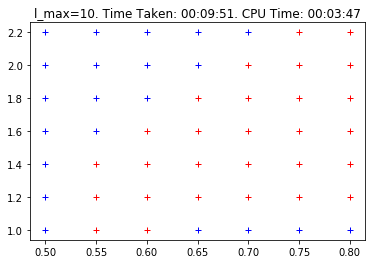

Run time 00:09:59 CPU time 00:03:55


In [24]:
iterate_l_max([10])

This seems to suggest that increasing l_max actually increases the region of the allowed space.
This is not what one would expect.

Running the SDPB for l=0,1,...,7 seemed to not produce any allowed points.
We try l_max=8:

/Users/MatthewDowens/Dropbox/PhD/bootstrap/pycftboot/bootstrap.py:952: RuntimeWarning: invalid value encountered in subtract
  product *= x - (p - shift)
/Users/MatthewDowens/Dropbox/PhD/bootstrap/pycftboot/bootstrap.py:953: RuntimeWarning: invalid value encountered in add
  return (base ** (x + shift)) / product


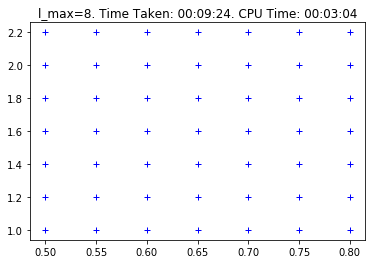

Run time 00:09:31 CPU time 00:03:11


In [28]:
iterate_l_max(8)

We now try l_max=9, to see if this represents an inbetween state or whether there is an abrupt change at l_max=10:

/Users/MatthewDowens/Dropbox/PhD/bootstrap/pycftboot/bootstrap.py:952: RuntimeWarning: invalid value encountered in subtract
  product *= x - (p - shift)
/Users/MatthewDowens/Dropbox/PhD/bootstrap/pycftboot/bootstrap.py:953: RuntimeWarning: invalid value encountered in add
  return (base ** (x + shift)) / product


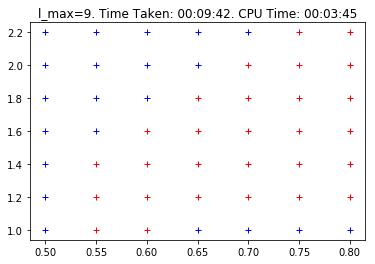

Run time 00:09:49 CPU time 00:03:52


In [29]:
iterate_l_max(9)

This is identical to the l_max=10 case.
l_max=9 is therefore the cutoff.
Does this cutoff exist for all values of other possible parameters?
Does its value depend on the values of the other parameters?